In [1]:
from sectional_v2.util.plot.plot_maps import plot_map_diff, fix_axis4map_plot, plot_map_abs_abs_diff, plot_map, subplots_map, plot_map_diff_2case
from useful_scit.imps import (np, xr, plt, pd) 
from sectional_v2.util.imports import get_averaged_fields
from IPython.display import clear_output
from sectional_v2.util.plot.plot_maps import plot_map_diff, fix_axis4map_plot, plot_map_abs_abs_diff, plot_map, subplots_map, plot_map_diff_2case,plot_map_diff_only
from sectional_v2.util.slice_average.significance import load_and_plot_sign

# load and autoreload
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV/
/home/ubuntu/mnts/nird/projects/OAS-DEV/sectional_v2/data_info/area_defs.csv
eee
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2014-12'
p_level=1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
if avg_over_lev:
    pressure_adjust = True
p_levels = [1013.,900., 800., 700., 600.]  # used if not avg

In [4]:
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders
version='v21_both'
plot_path = get_plotpath('maps')
filen_base = plot_path+'/_%s'%version
#print(plot_path)
make_folders(plot_path)

## Cases

In [5]:
to_case = 'SECTv21_ctrl_koagD'#_def'
from_cases = ['noSECTv21_default_dd','noSECTv21_ox_ricc_dd']
cases =[to_case]+from_cases

In [6]:
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders

In [7]:
def load_and_plot(var, cases,startyear, endyear,
                                   avg_over_lev=avg_over_lev,
                                   pmin=pmin,
                                   pressure_adjust=pressure_adjust, p_level=None, relative=False):
    maps_dic = get_averaged_fields.get_maps_cases(cases,[var],startyear, endyear,
                                   avg_over_lev=avg_over_lev,
                                   pmin=pmin,
                                   pressure_adjust=pressure_adjust, p_level=p_level)
    clear_output()
    return plot_map_abs_abs_diff(var, cases, maps_dic, relative=relative, figsize=[18, 3], cbar_equal=True,
                          kwargs_abs={},
                          kwargs_diff={}, axs=None, cmap_abs='Reds', cmap_diff='RdBu_r')
    


In [8]:
def load_and_plot_rows(varl, cases,startyear, endyear,
                                   avg_over_lev=avg_over_lev,
                                   pmin=pmin,
                                   pressure_adjust=pressure_adjust, p_level=None, relative=False):
    maps_dic = get_averaged_fields.get_maps_cases(cases,varl,startyear, endyear,
                                   avg_over_lev=avg_over_lev,
                                   pmin=pmin,
                                   pressure_adjust=pressure_adjust, p_level=p_level)
    fig, axs = subplots_map(len(varl), 3, figsize=[18,3*len(varl)])
    ii=0
    for var in varl:
        axss= axs[ii,:]
        ii+=1
        plot_map_abs_abs_diff(var, cases, maps_dic, relative=relative, figsize=[18, 3], cbar_equal=True,
                          kwargs_abs={}, axs=axss,
                          kwargs_diff={}, cmap_abs='Reds', cmap_diff='RdBu_r')
    
    return axs

In [9]:
def load_and_plot_diff(varl, cases,startyear, endyear,
                       avg_over_lev=avg_over_lev,
                       pmin=pmin,nr_cols=2,
                       pressure_adjust=pressure_adjust, 
                       p_level=None, 
                       relative=False,
                      width=5.):
    maps_dic = get_averaged_fields.get_maps_cases(cases,varl,startyear, endyear,
                                   avg_over_lev=avg_over_lev,
                                   pmin=pmin,
                                   pressure_adjust=pressure_adjust, p_level=p_level)
    plot_diff(maps_dic, varl, cases,nr_cols=nr_cols, relative=relative, width=width)
    return


def plot_diff(maps_dic, varl, cases,nr_cols=2, relative=False, width=5., axs=None):
    #fig, axs = subplots_map(int(np.ceil(len(varl)/2)), 2, figsize=[10,4*len(varl)])
    if axs is None:
        nr_rows = int(np.ceil(len(varl)/nr_cols))
        print(nr_rows)
        fig, axs = subplots_map(nr_rows, nr_cols, figsize=[width*nr_cols,2.5*nr_rows])#7*nr_cols,3*nr_rows])
    for var, ax in zip(varl, axs.flatten()):
        plot_map_diff_2case(var,cases[0],cases[1], maps_dic, relative=relative, 
                               ax=ax, cmap_diff='RdBu_r')



In [10]:
def load_and_plot_diff_mm(varl,to_case,from_cases,startyear, endyear,
                       avg_over_lev=avg_over_lev,
                       pmin=pmin,nr_cols=2,
                       pressure_adjust=pressure_adjust, 
                       p_level=None, 
                       relative=False,
                      width=6.):
    cases = [to_case] + from_cases
    maps_dic = get_averaged_fields.get_maps_cases(cases,varl,startyear, endyear,
                                   avg_over_lev=avg_over_lev,
                                   pmin=pmin,
                                   pressure_adjust=pressure_adjust, p_level=p_level)
    nr_rows = int(np.ceil(len(varl)/nr_cols))
    nr_cols = len(from_cases)
    fig, axs = subplots_map(nr_rows, nr_cols, figsize=[width*nr_cols,2.5*nr_rows])
    for from_case,i in zip(from_cases,range(nr_cols)):
        sax = axs[:,i]
        plot_diff(maps_dic, varl, [from_case,to_case],nr_cols=nr_cols, relative=relative, width=width, axs=sax)
    return

In [11]:
from useful_scit.plot.fig_manip import subp_insert_abc
import cartopy.crs as ccrs

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/N_AER_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/NCONC01_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/N_AER_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/NCONC01_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/N_AER_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/NCONC01_2008-01-2014-12_avg2lev850.nc
['noSECTv21_default_dd', 'noSECTv21_ox_ricc_dd']
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OA

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/N_AER_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/N_AER_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


['noSECTv21_default_dd', 'noSECTv21_ox_ricc_dd']
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/NCONC01_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/NCONC01_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/NCONC01_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/NCONC01_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/maps//_v21_bothN_AER_NCONC01True.


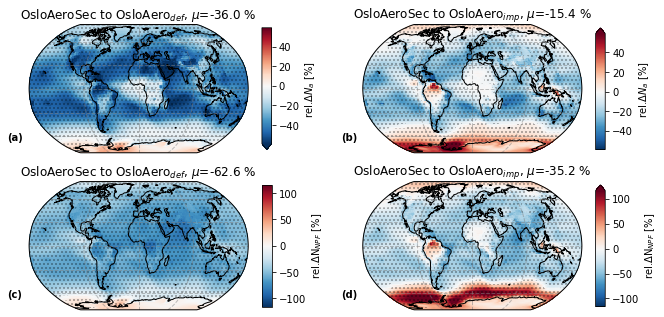

In [12]:
varl_rel = ['N_AER', 'NCONC01']#,'TGCLDCWP']
varl_abs=[]#,'TGCLDCWP']
varl = varl_rel+varl_abs
    

                        
width=4.7
asp_rat = 0.48
relative=True

cases = [to_case] + from_cases
maps_dic = get_averaged_fields.get_maps_cases(cases,varl,startyear, endyear,
                                   avg_over_lev=avg_over_lev,
                                   pmin=pmin,
                                   pressure_adjust=pressure_adjust, p_level=p_level)
nr_cols = len(from_cases)
nr_rows = int(np.ceil(len(varl)))
fig, axs = subplots_map(nr_rows, nr_cols, figsize=[width*nr_cols,asp_rat*width*nr_rows])
for i, var in enumerate(varl):
    saxs = axs[i,:] 
    plot_map_diff_only(var, [to_case,*from_cases], maps_dic, relative=(var in varl_rel), cbar_equal=True,
                       kwargs_diff={}, axs=saxs, cmap_diff='RdBu_r',
                       cbar_loc='side', tight_layout=False, inverse_diff=True)
    load_and_plot_sign(to_case, from_cases, saxs, var, startyear, endyear, pressure_adjust=pressure_adjust,
                       avg_over_lev=avg_over_lev,
                       ci=.95,
                       groupby=None,
                       dims=('lev',),
                       area='Global',
                       avg_dim='time',
                       hatches=['...',''], hatch_lw = .3, transform=ccrs.PlateCarree(),
                       reverse=False)
#for from_case,i in zip(from_cases,range(nr_cols)):
#    sax = axs[:,i]
#    for var, ax in zip(varl, sax.flatten()):
#        plot_map_diff_2case(var, from_case,to_case, maps_dic, relative=(var in varl_rel), 
#                               ax=ax, cmap_diff='RdBu_r')

subp_insert_abc(axs, pos_y=0.1)

#plot_diff(maps_dic, varl, cases[::-1],nr_cols=1, relative=relative)
#load_and_plot_diff_mm(varl,to_case,from_cases, startyear, endyear, avg_over_lev,  pmin=pmin, relative=relative, pressure_adjust=pressure_adjust,nr_cols=1, width=5.5)
fn = filen_base + '_'.join(varl)+f'{relative}.'
print(fn)
plt.tight_layout()
#plt.savefig(fn + 'png')
#plt.savefig(fn + 'pdf')

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/N_AER_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/NCONC01_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/N_AER_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/NCONC01_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/N_AER_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/NCONC01_2008-01-2014-12_avg2lev850.nc


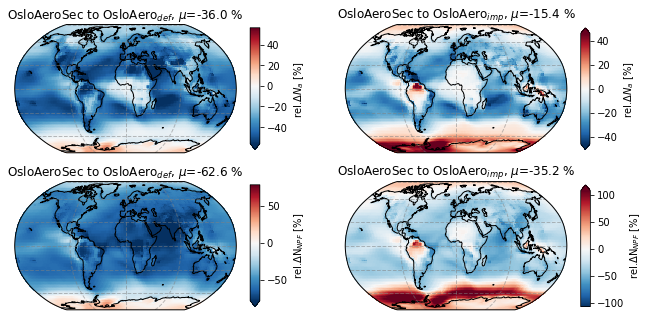

In [15]:
varl_rel = ['N_AER', 'NCONC01']#,'TGCLDCWP']
varl_abs=[]#'NCFT_Ghan']#,'TGCLDCWP']
varl = varl_rel+varl_abs
                        
width=4.7
asp_rat = 0.48
relative=True

cases = [to_case] + from_cases
maps_dic = get_averaged_fields.get_maps_cases(cases,varl,startyear, endyear,
                                   avg_over_lev=avg_over_lev,
                                   pmin=pmin,
                                   pressure_adjust=pressure_adjust, p_level=p_level)
nr_cols = len(from_cases)
nr_rows = int(np.ceil(len(varl)))
fig, axs = subplots_map(nr_rows, nr_cols, figsize=[width*nr_cols,asp_rat*width*nr_rows])
for from_case,i in zip(from_cases,range(nr_cols)):
    sax = axs[:,i]
    for var, ax in zip(varl, sax.flatten()):
        plot_map_diff_2case(var, from_case,to_case, maps_dic, relative=(var in varl_rel), 
                               ax=ax, cmap_diff='RdBu_r')

    

#plot_diff(maps_dic, varl, cases[::-1],nr_cols=1, relative=relative)
#load_and_plot_diff_mm(varl,to_case,from_cases, startyear, endyear, avg_over_lev,  pmin=pmin, relative=relative, pressure_adjust=pressure_adjust,nr_cols=1, width=5.5)
fn = filen_base + '_'.join(varl)+f'{relative}.'
plt.tight_layout()
#plt.savefig(fn + 'png')
#plt.savefig(fn + 'pdf')

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/cb_SOA_NA_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/cb_SO4_NA_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/cb_NA_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/cb_SOA_NA_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/cb_SO4_NA_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/cb_NA_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSEC

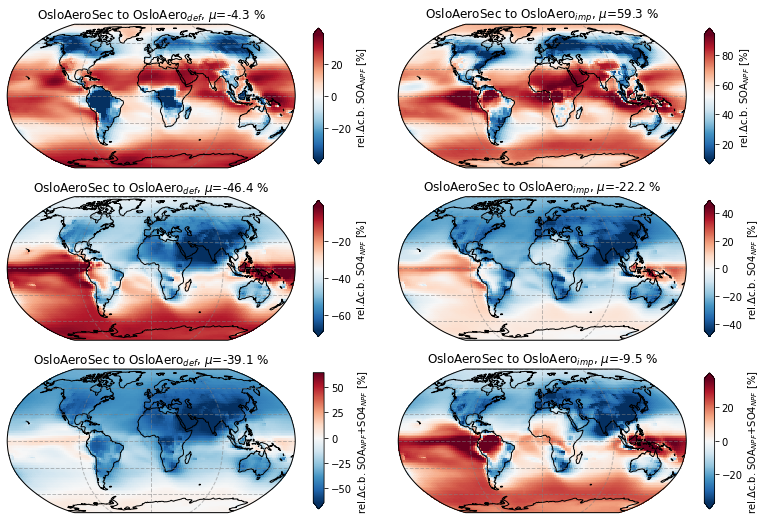

In [16]:

    
varl=['cb_SOA_NA','cb_SO4_NA', 'cb_NA']#,'LWDIR_Ghan']#'LWDIR_Ghan']#, 'SO4_NAcondTend']#, 'leaveSecH2SO4','leaveSecSOA']#,'TGCLDCWP']

relative=True
#plot_diff(maps_dic, varl, cases[::-1],nr_cols=1, relative=relative)
load_and_plot_diff_mm(varl,to_case,from_cases, startyear, endyear, avg_over_lev,  pmin=pmin, 
                      relative=relative, pressure_adjust=pressure_adjust,nr_cols=1, width=5.5)
fn = filen_base + '_'.join(varl)+f'{relative}.'

plt.tight_layout()
#plt.savefig(fn + 'png')
#plt.savefig(fn + 'pdf')
print(fn)

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/FORMRATE_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/GR_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/COAGNUCL_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/FORMRATE_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/GR_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/COAGNUCL_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/

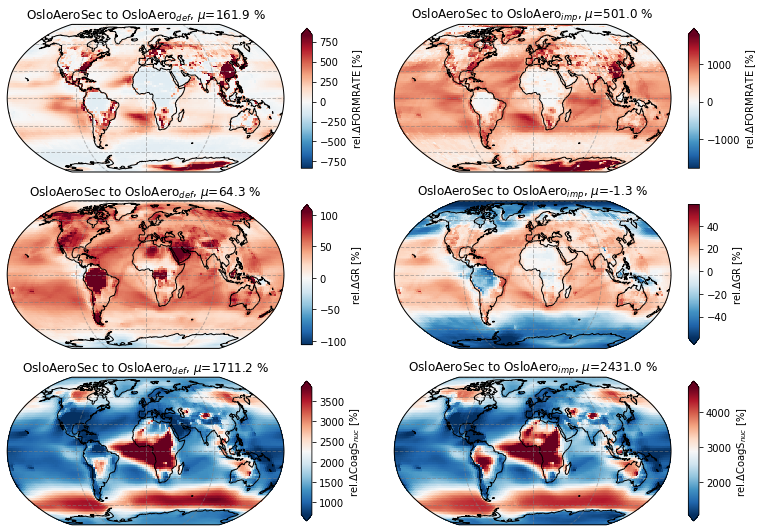

In [17]:

    
varl=['FORMRATE', 'GR','COAGNUCL']#, 'NCFT_Ghan']#'ACTREL_incld','TGCLDCWP']#,'TGCLDCWP']

relative=True
#plot_diff(maps_dic, varl, cases[::-1],nr_cols=1, relative=relative)
load_and_plot_diff_mm(varl,to_case,from_cases, startyear, endyear, avg_over_lev,  pmin=pmin, relative=relative, pressure_adjust=pressure_adjust,nr_cols=1, width=5.5)
fn = filen_base + '_'.join(varl)+f'{relative}.'
plt.tight_layout()
#plt.savefig(fn + 'png')
#plt.savefig(fn + 'pdf')

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/SOA_NAcondTend_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/SO4_NAcondTend_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/SOA_NAcondTend_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/SO4_NAcondTend_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/SOA_NAcondTend_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/SO4_NAcondTend_2008-01-2014-12_lev_not_dim.nc


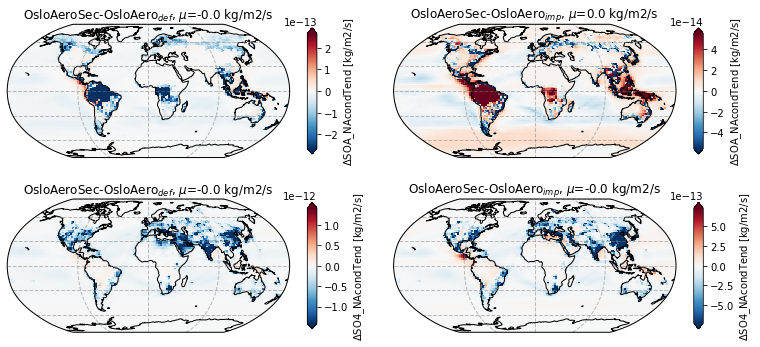

In [18]:

    
varl=['SOA_NAcondTend', 'SO4_NAcondTend']#, 'leaveSecH2SO4','leaveSecSOA']#,'TGCLDCWP']

relative=False
#plot_diff(maps_dic, varl, cases[::-1],nr_cols=1, relative=relative)
load_and_plot_diff_mm(varl,to_case,from_cases, startyear, endyear, avg_over_lev,  pmin=pmin, relative=relative, pressure_adjust=pressure_adjust,nr_cols=1, width=5.5)
fn = filen_base + '_'.join(varl)+f'{relative}.'
plt.tight_layout()
plt.savefig(fn + 'png')
plt.savefig(fn + 'pdf')

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/SOA_NA_totLossR_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/SOA_NA_lifetime_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/SOA_NA_totLossR_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/SOA_NA_lifetime_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/SOA_NA_totLossR_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/SOA_NA_lifetime_2008-01-2014-12_lev_not_dim.nc


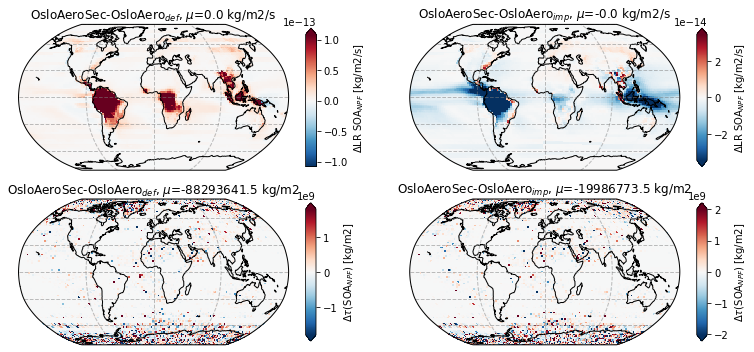

In [19]:

    
varl=['SOA_NA_totLossR','SOA_NA_lifetime']#'LWDIR_Ghan']#, 'SO4_NAcondTend']#, 'leaveSecH2SO4','leaveSecSOA']#,'TGCLDCWP']

relative=False
#plot_diff(maps_dic, varl, cases[::-1],nr_cols=1, relative=relative)
load_and_plot_diff_mm(varl,to_case,from_cases, startyear, endyear, avg_over_lev,  pmin=pmin, relative=relative, pressure_adjust=pressure_adjust,nr_cols=1, width=5.5)
fn = filen_base + '_'.join(varl)+f'{relative}.'

plt.tight_layout()
plt.savefig(fn + 'png')
plt.savefig(fn + 'pdf')

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/SOA_NA_lifetime_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/SOA_NA_lifetime_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/SOA_NA_lifetime_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/SOA_NA_lifetime_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/SOA_NA_lifetime_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/SOA_NA_lifetime_2008-01-2014-12_lev_not_dim.nc


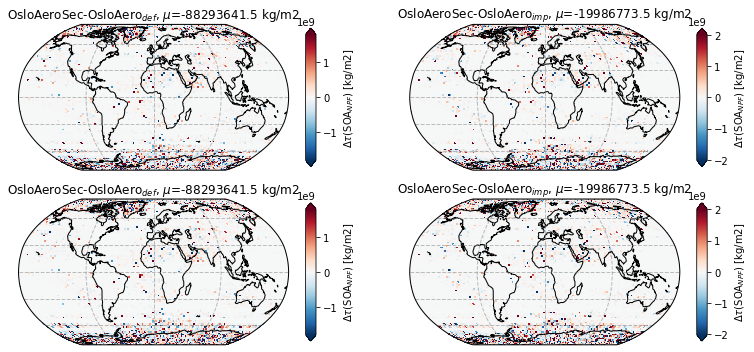

In [20]:

    
varl=['SOA_NA_lifetime','SOA_NA_lifetime']#'LWDIR_Ghan']#, 'SO4_NAcondTend']#, 'leaveSecH2SO4','leaveSecSOA']#,'TGCLDCWP']

relative=False
#plot_diff(maps_dic, varl, cases[::-1],nr_cols=1, relative=relative)
load_and_plot_diff_mm(varl,to_case,from_cases, startyear, endyear, avg_over_lev,  pmin=pmin, relative=relative, pressure_adjust=pressure_adjust,nr_cols=1, width=5.5)
fn = filen_base + '_'.join(varl)+f'{relative}.'

plt.tight_layout()
plt.savefig(fn + 'png')
plt.savefig(fn + 'pdf')

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/HYGRO01_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/HYGRO01_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/HYGRO01_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/HYGRO01_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/HYGRO01_2008-01-2014-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/HYGRO01_2008-01-2014-12_avg2lev850.nc


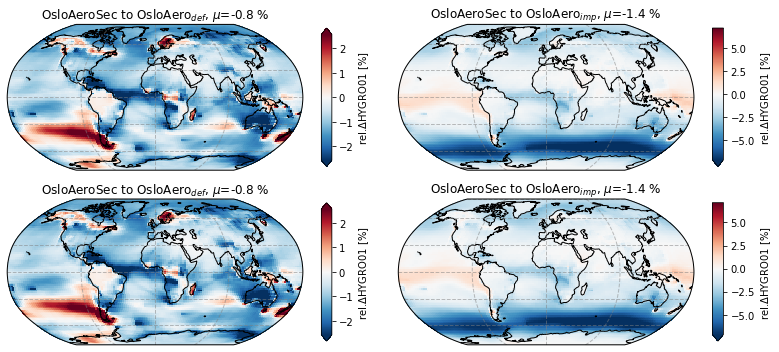

In [21]:

    
varl=['HYGRO01','HYGRO01']#, 'SO4_NAcondTend']#, 'leaveSecH2SO4','leaveSecSOA']#,'TGCLDCWP']

relative=True
#plot_diff(maps_dic, varl, cases[::-1],nr_cols=1, relative=relative)
load_and_plot_diff_mm(varl,to_case,from_cases, startyear, endyear, avg_over_lev,  pmin=pmin, relative=relative, pressure_adjust=pressure_adjust,nr_cols=1, width=5.5)
fn = filen_base + '_'.join(varl)+f'{relative}.'
plt.tight_layout()
plt.savefig(fn + 'png')
plt.savefig(fn + 'pdf')